In [1]:
import pandas as pd
import numpy as np
import csv
import	koreanize_matplotlib
import matplotlib.pyplot as plt

## 국민연금 가입

In [2]:
f1 = "국민연금 가입 사업장 내역_2022.csv"
pensionDF = pd.read_csv(f1, encoding="cp949")

C:\Users\kdp\AppData\Local\Temp\ipykernel_9372\274526030.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  pensionDF = pd.read_csv(f1, encoding="cp949")


In [3]:
pensionDF.head()

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,...,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,2022-10,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,...,1,292201,동력식 수지 공구 제조업,1988-01-01,NaN,NaN,4,899980,0,0
1,2022-10,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,...,1,701700,화장터 운영 묘지 분양 및 관리업,1988-01-01,NaN,NaN,10,3105220,0,0
2,2022-10,노들새마을금고,108820,1,06923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,...,1,659202,신용조합,1988-01-01,NaN,NaN,12,4956440,0,0
3,2022-10,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,...,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,1988-01-01,NaN,NaN,23,5123500,0,0
4,2022-10,희성전자(주),106810,1,04410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,395,187681460,0,1


In [4]:
pensionDF.columns

Index(['자료생성년월', '사업장명', '사업자등록번호', '사업장가입상태코드 1 등록 2 탈퇴', '우편번호', '사업장지번상세주소',
       '사업장도로명상세주소', '고객법정동주소코드', '고객행정동주소코드', '법정동주소광역시도코드', '법정동주소광역시시군구코드',
       '법정동주소광역시시군구읍면동코드', '사업장형태구분코드 1 법인 2 개인', '사업장업종코드', '사업장업종코드명',
       '적용일자', '재등록일자', '탈퇴일자', '가입자수', '당월고지금액', '신규취득자수', '상실가입자수'],
      dtype='object')

사용할 데이터 col을 뽑아보자

In [5]:
pensionDF = pensionDF[["사업장명", "사업장지번상세주소", "가입자수", "당월고지금액"]]

"사업장지번상세주소" -> "본사주소"로 변경

In [6]:
pensionDF.columns = ["사업장명", "본사주소", "가입자수", "당월고지금액"]
pensionDF.columns

Index(['사업장명', '본사주소', '가입자수', '당월고지금액'], dtype='object')

### 주소분리

In [7]:
pensionDF.sort_values("당월고지금액")

,사업장명,본사주소,가입자수,당월고지금액
447879,(주)포올이앤씨-(일용)한빛본부 사택 3단지(1차) 신축 통신공사,전라남도 영광군 홍농읍,0,0
42492,(주)업투어,서울특별시 중구 무교동,0,0
524266,새한건설주식회사/일용/부림 중권마을 세천 정비공사,경상남도 의령군 가례면,0,0
411032,(주)협성기전/일용/시화MTV단지조성 전기공사,경기도 안산시 단원구 성곡동,0,0
494256,리코플러스주식회사,서울특별시 영등포구 여의도동,0,0
...,...,...,...,...
157889,엘지디스플레이(주),서울특별시 영등포구 여의도동,30113,13448143760
141812,에스케이하이닉스 주식회사,경기도 이천시 부발읍,30660,14946654220
13552,엘지전자(주),서울특별시 영등포구 여의도동,35023,16803546620
3325,현대자동차(주),서울특별시 서초구 양재동,67671,32199115080


In [8]:
addr = pd.DataFrame(pensionDF["본사주소"])
addr = addr["본사주소"].apply(lambda x : x.split()[:2])
addr =	pd.DataFrame(addr.tolist(), columns=('시도', '군구'))
addr.head()

,시도,군구
0,경기도,광주시
1,경기도,포천시
2,서울특별시,동작구
3,인천광역시,서구
4,서울특별시,용산구


In [9]:
pensionDF[["시도", "군구", "나머지 주소"]] = pensionDF["본사주소"].str.split(' ', n=2, expand=True)
pensionDF.head()

,사업장명,본사주소,가입자수,당월고지금액,시도,군구,나머지 주소
0,우성기전(주),경기도 광주시 도척면,4,899980,경기도,광주시,도척면
1,서능공원묘지운영회(재),경기도 포천시 내촌면,10,3105220,경기도,포천시,내촌면
2,노들새마을금고,서울특별시 동작구 노량진동,12,4956440,서울특별시,동작구,노량진동
3,유창성업(주),인천광역시 서구 오류동,23,5123500,인천광역시,서구,오류동
4,희성전자(주),서울특별시 용산구 한남동,395,187681460,서울특별시,용산구,한남동


In [10]:
pensionDF = pensionDF.drop("본사주소", axis = True)

In [11]:
pensionDF["시도"].unique()

array(['경기도', '서울특별시', '인천광역시', '전라북도', '충청남도', '충청북도', '강원도', '부산광역시',
       '전라남도', '울산광역시', '경상북도', '세종특별자치시', '경상남도', '대구광역시', '', '제주특별자치도',
       '대전광역시', '광주광역시', '황해북도'], dtype=object)

In [12]:
pensionDF[pensionDF["시도"] == ""]

,사업장명,가입자수,당월고지금액,시도,군구,나머지 주소
1182,(주)경인종합개발,6,864320,,,
1403,동양플러스(주),248,50189960,,,
1830,삼양그라비아(주),10,3616260,,,
2358,한남공원묘원재단법인,13,4989260,,,
2906,(재)삼성개발공원묘원,17,4747960,,,
...,...,...,...,...,...,...
540285,신목건설주식회사/일용/능평리 427-27 주택 신축공사(골조공사 및 부대공사),10,1728000,,,
540327,(주)씨앤케이/일용/2022년 소규모 공공시설 시설물 유지관리 단가공사(3차),0,0,,,
541512,(주)스멜츠,5,1219500,,,
541594,(주)빌리언스,11,2979800,,,


## <hr>SW 기업 DF뽑기

In [13]:
f2 = "정보통신산업진흥원_SW산업정보종합시스템 사업자정보DB_20221031.csv"
swDF = pd.read_csv(f2, encoding="cp949")

In [14]:
swDF

,회사명,대표이사,홈페이지,본사주소,재무현황연도
0,(주)라이드소프트,강태훈,http://www.rydesoft.com,"경기도 성남시 수정구 탄리로 57, 성남벤처빌딩 207호 (수진동)",2009
1,(주)코제코,문시환,http://www.pressblog.co.kr,"서울 서초구 반포대로 90(서초동, 세환빌딩5층)",2011
2,(주)시코에프에이,김관중,http://www.sico.so.kr,"서울특별시 금천구 가산디지털2로 114, 3층 302호 (가산동)",2009
3,하니웰에어포트시스템즈게엠베하한국지점,귄테르쉬펜회펠,http://,"인천광역시 중구 공항동로295번길 124, 신불2단지 (운서동)",2009
4,지하정보기술(주),김창동,http://,"경기도 의왕시 이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)",2019
...,...,...,...,...,...
52587,토탈시스,고대식,http://,"서울특별시 구로구 신도림로17길 15, 1동 9층 2호(신도림동, 온리빌딩)",2021
52588,맘스퀘스천,심재우,http://,"서울특별시 강남구 강남대로156길 14, 203호 (신사동)",2021
52589,인지믹스,김주현,http://,"대구광역시 달서구 상인로 128, 2층 205호(상인동, 달서구시니어기술창업센터)",2021
52590,(주)서이시스템,박형호,http://www.seoisystem.com,"경기도 하남시 미사강변중앙로7번안길 25, A동 5층 503호 (풍산동, 유테크밸리)",2021


In [15]:
swDF.columns

Index(['회사명', '대표이사', '홈페이지', '본사주소', '재무현황연도'], dtype='object')

In [16]:
swDF = swDF[["회사명", "본사주소"]]
swDF.head()

,회사명,본사주소
0,(주)라이드소프트,"경기도 성남시 수정구 탄리로 57, 성남벤처빌딩 207호 (수진동)"
1,(주)코제코,"서울 서초구 반포대로 90(서초동, 세환빌딩5층)"
2,(주)시코에프에이,"서울특별시 금천구 가산디지털2로 114, 3층 302호 (가산동)"
3,하니웰에어포트시스템즈게엠베하한국지점,"인천광역시 중구 공항동로295번길 124, 신불2단지 (운서동)"
4,지하정보기술(주),"경기도 의왕시 이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)"


회사명 -> 사업장명으로 변경

In [17]:
swDF.columns = ["사업장명", "본사주소"]
swDF.head()
# f.reindex(columns=['http_status', 'user_agent'])

,사업장명,본사주소
0,(주)라이드소프트,"경기도 성남시 수정구 탄리로 57, 성남벤처빌딩 207호 (수진동)"
1,(주)코제코,"서울 서초구 반포대로 90(서초동, 세환빌딩5층)"
2,(주)시코에프에이,"서울특별시 금천구 가산디지털2로 114, 3층 302호 (가산동)"
3,하니웰에어포트시스템즈게엠베하한국지점,"인천광역시 중구 공항동로295번길 124, 신불2단지 (운서동)"
4,지하정보기술(주),"경기도 의왕시 이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)"


In [18]:
swDF[["시도", "군구", "나머지 주소"]] = swDF["본사주소"].str.split(' ', n=2, expand=True)
swDF.head()

C:\Users\kdp\AppData\Local\Temp\ipykernel_9372\1661869292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swDF[["시도", "군구", "나머지 주소"]] = swDF["본사주소"].str.split(' ', n=2, expand=True)
C:\Users\kdp\AppData\Local\Temp\ipykernel_9372\1661869292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swDF[["시도", "군구", "나머지 주소"]] = swDF["본사주소"].str.split(' ', n=2, expand=True)


,사업장명,본사주소,시도,군구,나머지 주소
0,(주)라이드소프트,"경기도 성남시 수정구 탄리로 57, 성남벤처빌딩 207호 (수진동)",경기도,성남시,"수정구 탄리로 57, 성남벤처빌딩 207호 (수진동)"
1,(주)코제코,"서울 서초구 반포대로 90(서초동, 세환빌딩5층)",서울,서초구,"반포대로 90(서초동, 세환빌딩5층)"
2,(주)시코에프에이,"서울특별시 금천구 가산디지털2로 114, 3층 302호 (가산동)",서울특별시,금천구,"가산디지털2로 114, 3층 302호 (가산동)"
3,하니웰에어포트시스템즈게엠베하한국지점,"인천광역시 중구 공항동로295번길 124, 신불2단지 (운서동)",인천광역시,중구,"공항동로295번길 124, 신불2단지 (운서동)"
4,지하정보기술(주),"경기도 의왕시 이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)",경기도,의왕시,"이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)"


In [19]:
swDF = swDF.drop("본사주소", axis=True)

In [20]:
swDF["시도"].unique()

array(['경기도', '서울', '서울특별시', '인천광역시', '대구', '경상북도', '전라북도', '대전광역시',
       '대구광역시', '충청북도', '부산광역시', '전라남도', '제주특별자치도', '강원도', '충청남도', '경상남도',
       '광주광역시', '경북', '인천', '경기', '충남', '대전', '울산광역시', '전북', '세종특별자치시',
       '충북', '제주', '서울시', '광주', '강원', '부산', '울산', '전남', '울산시', '인천시중구',
       '부산시', '서울특별', '서울특별시시', '제주시', '경남', '대구시', '대전시',
       '충북청주기청원구토성로362번길', '인천광역시동구', '인천시', '광주시'], dtype=object)

In [21]:
addr_aliases =	{'서울':'서울특별시', '대구':'대구광역시', "대구시":"대구광역시",'경북':'경상북도',	'인천':'인천광역시',	
'경기':'경기도',	'충남':'충청남도', '대전':'대전광역시', '전북':'전북특별자치도', "전라북도":"전북특별자치도",	
'충북':'충청북도', '제주':'제주특별자치도', "서울시":"서울특별시", "광주":"광주광역시", "강원":"강원특별자치도", "부산":"부산광역시", "울산":"울산광역시", "전남":"전라남도", "울산시":"울산광역시", "인천시중구":"인천광역시",
"부산시":"부산광역시", "서울특별":"서울특별시", "서울특별시시":"서울특별시", "제주시":"제주특별자치도", "경남":"경상남도", "대구":"대구광역시", "대전시":"대전광역시", "충북청주기청원구토성로362번길":"충청북도", "인천광역시동구":"인천광역시",
"인천시":"인천광역시", "광주시":"광주광역시", "강원도":"강원특별자치도"}

In [22]:
swDF['시도'] = swDF['시도'].apply(lambda	v: addr_aliases.get(v, v))

In [23]:
swDF["시도"].unique()

array(['경기도', '서울특별시', '인천광역시', '대구광역시', '경상북도', '전북특별자치도', '대전광역시',
       '충청북도', '부산광역시', '전라남도', '제주특별자치도', '강원특별자치도', '충청남도', '경상남도',
       '광주광역시', '울산광역시', '세종특별자치시'], dtype=object)

## join 사업장명을 기준으로
- swDF->본사만
- pensionDF->지사포함

In [24]:
mergeDF = pd.merge(swDF, pensionDF, on=["사업장명"])
mergeDF.head()

,사업장명,시도_x,군구_x,나머지 주소_x,가입자수,당월고지금액,시도_y,군구_y,나머지 주소_y
0,(주)시코에프에이,서울특별시,금천구,"가산디지털2로 114, 3층 302호 (가산동)",15,6217320,서울특별시,금천구,가산동
1,지하정보기술(주),경기도,의왕시,"이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)",15,5127700,경기도,의왕시,포일동
2,(주)베스텍,경기도,포천시,화현면 문암동길 33,30,9830120,경기도,포천시,화현면
3,(주)베스텍,경기도,포천시,화현면 문암동길 33,8,2967200,충청남도,아산시,둔포면
4,(주)베스텍,경기도,포천시,화현면 문암동길 33,40,10934480,광주광역시,북구,연제동


In [25]:
mergeDF['시도_y'] = np.where(mergeDF['시도_y']==" ", mergeDF['시도_y'], mergeDF['시도_x'])
mergeDF["시도_y"].value_counts()

서울특별시      5654
경기도        3337
대전광역시       803
부산광역시       722
경상북도        665
전라남도        660
강원특별자치도     589
인천광역시       535
대구광역시       532
경상남도        531
충청남도        448
전북특별자치도     441
충청북도        423
광주광역시       378
울산광역시       213
제주특별자치도     195
세종특별자치시     138
Name: 시도_y, dtype: int64

In [26]:
mergeDF["사업장명"].value_counts() # 대부분이 지사임 

대신네트웍스(주)      108
대신네트웍스주식회사      54
대한민국고엽제전우회      30
(주)대경           18
대신네트웍스 주식회사     16
              ... 
한국인식산업(주)        1
문엔지니어링(주)        1
화이트정보통신(주)       1
(주)에이알           1
(주)서이시스템         1
Name: 사업장명, Length: 12463, dtype: int64

In [27]:
mergeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16264 entries, 0 to 16263
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   사업장명      16264 non-null  object
 1   시도_x      16264 non-null  object
 2   군구_x      16264 non-null  object
 3   나머지 주소_x  16264 non-null  object
 4   가입자수      16264 non-null  int64 
 5   당월고지금액    16264 non-null  int64 
 6   시도_y      16264 non-null  object
 7   군구_y      16264 non-null  object
 8   나머지 주소_y  16264 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


In [28]:
a = ['경기도', '서울특별시', '인천광역시', '대구광역시', '경상북도', '전북특별자치도', '대전광역시',
       '충청북도', '부산광역시', '전라남도', '제주특별자치도', '강원특별자치도', '충청남도', '경상남도',
       '광주광역시', '울산광역시', '세종특별자치시'] # swDF

b = ['충청남도', '서울특별시', '경기도', '인천광역시', '충청북도', '강원특별자치도', '부산광역시',
       '전라남도', '울산광역시', '전북특별자치도', '경상북도', '세종특별자치시', '대구광역시', '경상남도', '',
       '제주특별자치도', '대전광역시', '광주광역시'] # pensionDF

In [29]:
set(a) - set(b)

set()

In [30]:
mergeDF2 = mergeDF.drop(["시도_x", "군구_x", "나머지 주소_x"],axis = True)
mergeDF2

,사업장명,가입자수,당월고지금액,시도_y,군구_y,나머지 주소_y
0,(주)시코에프에이,15,6217320,서울특별시,금천구,가산동
1,지하정보기술(주),15,5127700,경기도,의왕시,포일동
2,(주)베스텍,30,9830120,경기도,포천시,화현면
3,(주)베스텍,8,2967200,경기도,아산시,둔포면
4,(주)베스텍,40,10934480,경기도,북구,연제동
...,...,...,...,...,...,...
16259,(주)소셜엠씨,13,2691280,서울특별시,강남구,삼성동
16260,(주)시에스티코리아,5,1434600,서울특별시,동작구,사당동
16261,(주)포테이토넷,3,796940,서울특별시,광진구,자양동
16262,주식회사 씽크렉스,3,594720,충청남도,천안시,서북구 백석동


In [31]:
mergeDF2.sort_values("당월고지금액")
mergeDF2.columns = ["사업장명", "가입자수", "당월고지금액", "시도", "군구", "나머지 주소"]
mergeDF2.head()

,사업장명,가입자수,당월고지금액,시도,군구,나머지 주소
0,(주)시코에프에이,15,6217320,서울특별시,금천구,가산동
1,지하정보기술(주),15,5127700,경기도,의왕시,포일동
2,(주)베스텍,30,9830120,경기도,포천시,화현면
3,(주)베스텍,8,2967200,경기도,아산시,둔포면
4,(주)베스텍,40,10934480,경기도,북구,연제동


In [32]:
col_list = mergeDF2["시도"].unique()
for col in col_list:
    print(f"================{col}================")
    print(mergeDF2[mergeDF2["시도"]==col].sort_values("당월고지금액", ascending=False).head(3)["사업장명"])

================서울특별시================
4954       엘지전자(주)
5469    삼성에스디에스(주)
2669      현대모비스(주)
Name: 사업장명, dtype: object
================경기도================
4417     삼성전자(주)
4305    주식회사 케이티
6435     한국농어촌공사
Name: 사업장명, dtype: object
================경상남도================
6570       현대위아(주)
3492       영풍전자(주)
2755    (주)수성엔지니어링
Name: 사업장명, dtype: object
================충청북도================
14624        (주)네패스
12189     주식회사 씨앤에스
6830     충북대학교산학협력단
Name: 사업장명, dtype: object
================부산광역시================
9872       (주)휴넥트
2570      극동건설(주)
3193    대양전기공업(주)
Name: 사업장명, dtype: object
================대전광역시================
7676      한국수자원공사
7459    (주)케이티씨에스
63      한국전자통신연구원
Name: 사업장명, dtype: object
================강원특별자치도================
5963     (주)더존비즈온
5349        (주)서흥
1976    (주)한국고용정보
Name: 사업장명, dtype: object
================경상북도================
4263      (주)포스코건설
4772     한국전력기술(주)
6043    (주)포스코아이씨티
Name: 사업장명, dtype: object
================대구광역시================
10479    

In [33]:
#mergeDF2[mergeDF2["시도"]==col].sort_values("당월고지금액", ascending=False).head(3)["사업장명"]
col_list

array(['서울특별시', '경기도', '경상남도', '충청북도', '부산광역시', '대전광역시', '강원특별자치도',
       '경상북도', '대구광역시', '인천광역시', '전북특별자치도', '제주특별자치도', '광주광역시', '울산광역시',
       '전라남도', '충청남도', '세종특별자치시'], dtype=object)

## <hr>Group Area 

In [52]:
group_area = mergeDF2.groupby(["시도"]).sum()
group_area.head()

C:\Users\kdp\AppData\Local\Temp\ipykernel_9372\1388286200.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_area = mergeDF2.groupby(["시도"]).sum()


,가입자수,당월고지금액
시도,,
강원특별자치도,12562,3655041340
경기도,254214,105942230420
경상남도,15508,5142750420
경상북도,23179,8642799140
광주광역시,7313,2020746920


In [53]:
group_area["div"] = group_area["당월고지금액"] / group_area["가입자수"]

In [54]:
group_area = group_area.sort_values("div", ascending=False)
group_area

,가입자수,당월고지금액,div
시도,,,
경기도,254214,105942230420,416744.280095
울산광역시,16369,6720479680,410561.407539
경상북도,23179,8642799140,372871.959101
서울특별시,415825,149275981020,358987.509217
전라남도,20044,6800709940,339289.061066
경상남도,15508,5142750420,331619.191385
인천광역시,19643,6269316560,319162.885506
대전광역시,36701,11522843980,313965.395493
충청남도,10062,3050599860,303180.268336


In [59]:
col_list = group_area.index.to_list() # 순위대로 
company = []
color = []
for col in col_list:
    print(f"================{col}================")
    print(mergeDF2[mergeDF2["시도"]==col].sort_values("당월고지금액", ascending=False).head(3)["사업장명"])
    sr = mergeDF2[mergeDF2["시도"]==col].sort_values("당월고지금액", ascending=False).head(1)["사업장명"]
    if "광역시" in col:
        color.append("red")
    else:
        color.append("gray")
    company += sr.to_list()
    print(f"company = {company}")

================경기도================
4417     삼성전자(주)
4305    주식회사 케이티
6435     한국농어촌공사
Name: 사업장명, dtype: object
company = ['삼성전자(주)']
================울산광역시================
5618       현대중공업주식회사
8203     주식회사 수산이앤에스
10548      금양그린파워(주)
Name: 사업장명, dtype: object
company = ['삼성전자(주)', '현대중공업주식회사']
================경상북도================
4263      (주)포스코건설
4772     한국전력기술(주)
6043    (주)포스코아이씨티
Name: 사업장명, dtype: object
company = ['삼성전자(주)', '현대중공업주식회사', '(주)포스코건설']
================서울특별시================
4954       엘지전자(주)
5469    삼성에스디에스(주)
2669      현대모비스(주)
Name: 사업장명, dtype: object
company = ['삼성전자(주)', '현대중공업주식회사', '(주)포스코건설', '엘지전자(주)']
================전라남도================
15974    한전케이피에스 주식회사
4527        한전케이디엔(주)
5562     (주)하이테크엔지니어링
Name: 사업장명, dtype: object
company = ['삼성전자(주)', '현대중공업주식회사', '(주)포스코건설', '엘지전자(주)', '한전케이피에스 주식회사']
================경상남도================
6570       현대위아(주)
3492       영풍전자(주)
2755    (주)수성엔지니어링
Name: 사업장명, dtype: object
company = ['삼성전자(주)', '현대중공업주식회사',

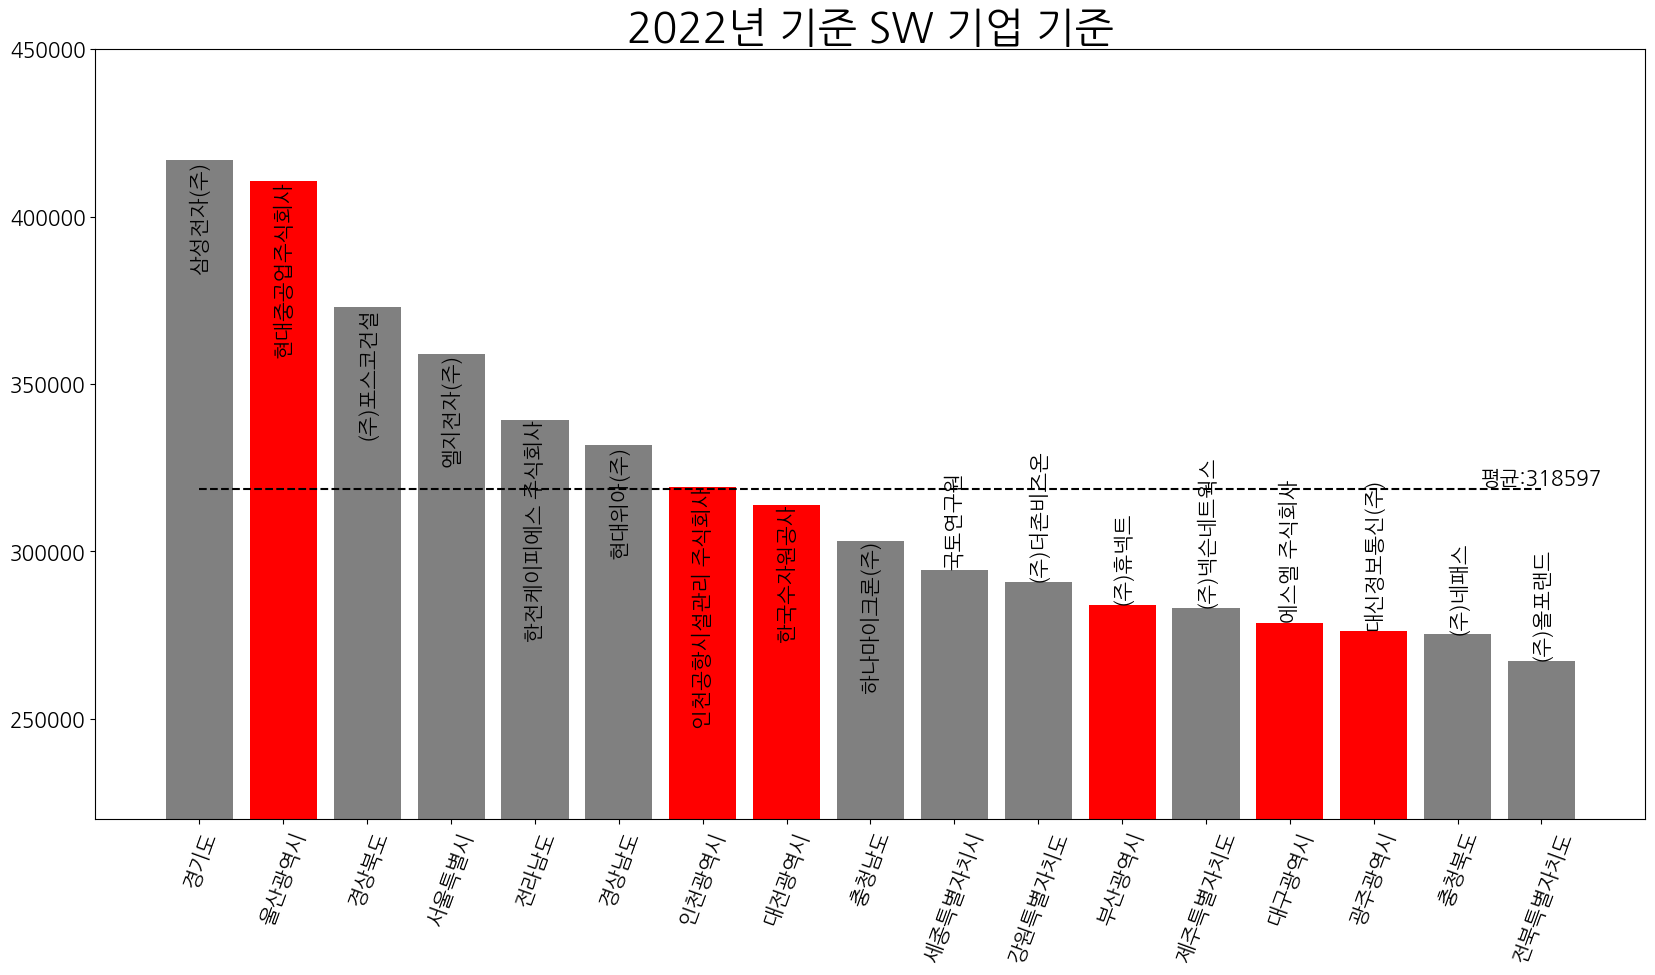

In [61]:
avg = group_area["div"].mean()
plt.figure(figsize=(20, 10))

x = group_area.index.to_list()
y = group_area["div"].to_list()

plt.plot(x, [avg]*len(x), "k--")
bar = plt.bar(x, y, color = color)


plt.xticks(rotation=70)
plt.ylim(220000, 450000)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

idx = 0

plt.title("2022년 기준 SW 기업 기준", fontsize = "30")
# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    if idx < 9:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='top', size = 15, rotation=90)
    else:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='bottom', size = 15, rotation=90)
    idx += 1

plt.text(rect.get_x() + rect.get_width()/2.0, avg, f"평균:{round(avg)}", ha='center', va='bottom', size = 15)

plt.show()

In [50]:
company

['삼성전자(주)',
 '현대중공업주식회사',
 '주식회사포스코',
 '현대자동차(주)',
 '한국전력공사',
 '삼성중공업(주)거제조선소',
 '한국지엠주식회사',
 '한국철도공사',
 '현대제철주식회사당진공장',
 '한국콜마주식회사',
 '부산교통공사',
 '주식회사 카카오',
 '한국가스공사',
 '기아(주) AutoLand광주',
 '현대엘리베이터(주)']

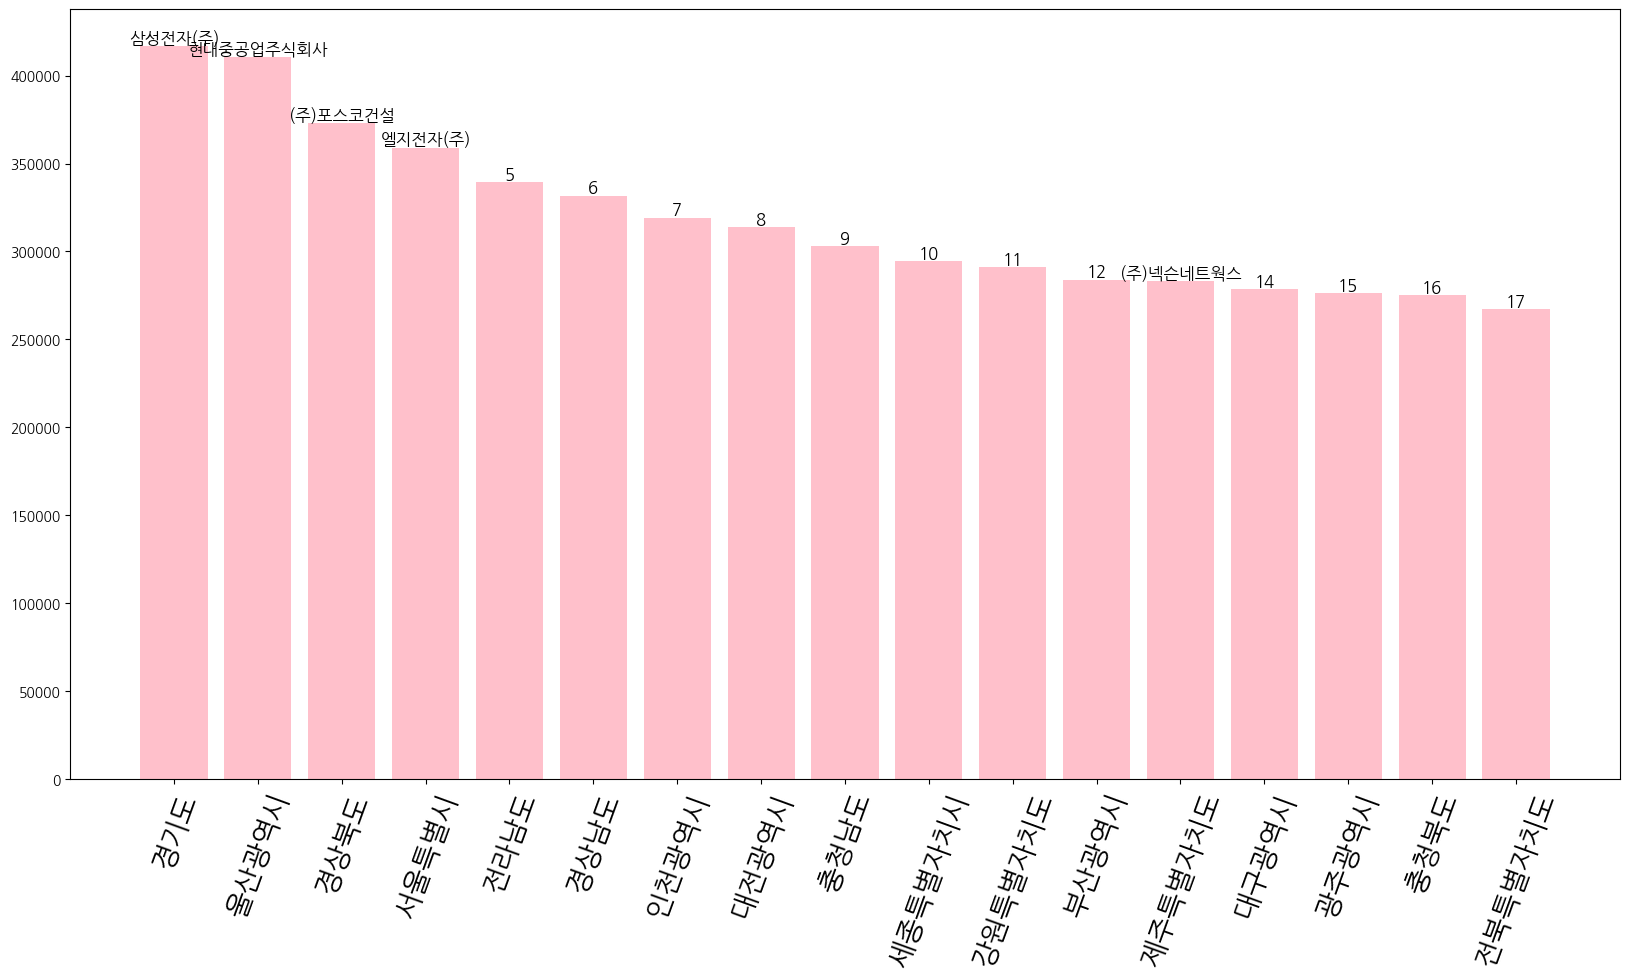

In [42]:
plt.figure(figsize=(20, 10))
x = group_area.index.to_list()
y = group_area["div"].to_list()
bar = plt.bar(x, y, color = 'pink')
plt.xticks(rotation=70)
# plt.ylim(280000, 350000)
plt.rc('xtick', labelsize=20)

company = ["삼성전자(주)", "현대중공업주식회사", "(주)포스코건설", "엘지전자(주)", "5", "6", "7", "8", "9", "10", "11", "12", "(주)넥슨네트웍스", "14", "15", "16", "17"]
idx = 0
# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='bottom', size = 12)
    idx += 1